In [155]:
# Lab 2.4: Running Regressions on Salary data
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [156]:
# Load the data and get a sense of what it looks like
df = pd.read_csv('salary.dat.txt', delim_whitespace=True)
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [157]:
# Apply value_counts() to series for "sx", "dg", and "rk"
print df.sx.value_counts()
print df.dg.value_counts()
print df.rk.value_counts()

male      38
female    14
Name: sx, dtype: int64
doctorate    34
masters      18
Name: dg, dtype: int64
full         20
assistant    18
associate    14
Name: rk, dtype: int64


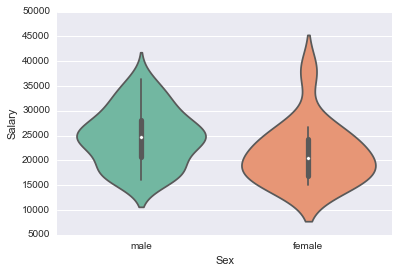

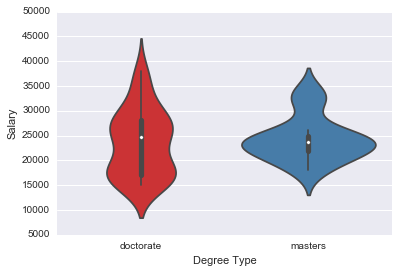

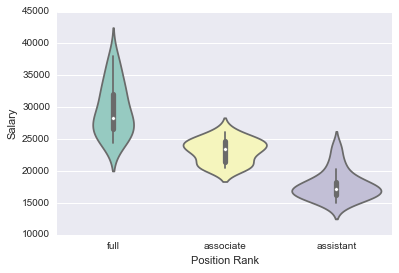

In [158]:
# These violin plots will show how salaries are distributed for males and females. 
# The pay gap is predictibly depressing. I've added axis labels and messed 
# around with the hues a little bit.

sns.violinplot(x='sx', y='sl', data=df, palette='Set2')
sns.axlabel('Sex', 'Salary')
plt.show()
# This one shows how salary is distributed for different degree types
sns.violinplot(x='dg', y='sl', data=df, palette='Set1')
sns.axlabel('Degree Type', 'Salary')
plt.show()

#Finally, we'll compare position rank with salary
sns.violinplot(x='rk', y='sl', data=df, palette='Set3')
sns.axlabel('Position Rank', 'Salary')
plt.show()

In [159]:
# Create some dummy variables for these categories
categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
# Is there a reason we'd want to use concat here instead of join? 
df.head()



Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [160]:
subset = df.sample(frac=0.1, replace=False)
X=subset[[u'yr', u'yd']]
y=subset[u'sl']

lm=linear_model.LinearRegression()
model=lm.fit(X,y)
prediction = lm.predict(X)
print 'Sample: ', lm.score(X,y)

#Applied to the whole data set
X = df[[u'yr', u'yd']]
y = df[u'sl']
print 'All data with sample model: ', lm.score(X,y)
# Running the above code several times showed that it's really hard to get an accurate
# model from such a small subset
# Repeated with regularization

X=subset[[u'yr', u'yd']]
y=subset[u'sl']

lm = linear_model.RidgeCV(alphas=[15])
model = lm.fit(X,y)
predictions = lm.predict(X)
print 'Sample with regularization: ', lm.score(X,y)

#Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print 'All data with regularization model: ', lm.score(X,y)


Sample:  0.810744838864
All data with sample model:  0.504840714814
Sample with regularization:  0.803232422648
All data with regularization model:  0.478180588058


0.88630543814


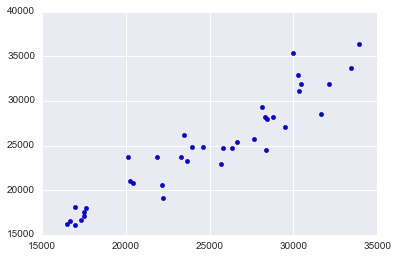

In [161]:
lm = linear_model.LinearRegression()
mask = df['sx']=='male'
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

model = lm.fit(X,y)
predictions=lm.predict(X)
print lm.score(X,y)
plt.scatter(predictions, y)

#This is a model fit to the categories for men. 

0.69448811957020717

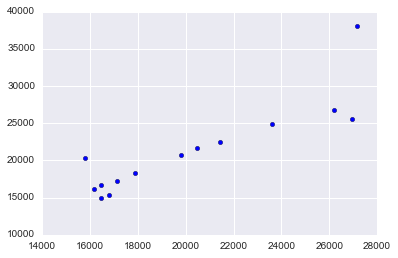

In [162]:
#Let's try to fit this model to women
mask2=df['sx']=='female'
X2=df[mask2][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y2=df[mask2][u'sl']
predicts = lm.predict(X2)
plt.scatter(predicts, y2)
lm.score(X2,y2)
# I think this is doing the right thing. It seems to apply that the model we created for men
# doesn't work as well for women. I'd still like to know how to graph this to see the comparison

0.78183724073136451

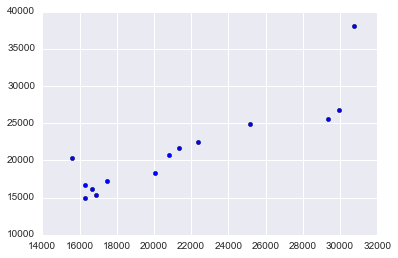

In [163]:
#Apply the model to women first
lm = linear_model.LinearRegression()
lm.fit(X2,y2)
prediction = lm.predict(X2)
plt.scatter(prediction, y2)
lm.score(X2,y2)
# running this model for females doesn't reveal as strong a model. 
#The r^2 score is lower at 0.78.

0.65752342927460783

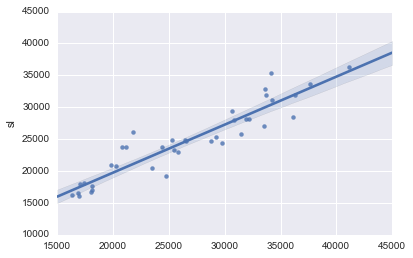

In [167]:
#Fitting the female model to males. Since we created different masks and arrays, we can 
#reuse the ones we already created.
import seaborn as sns
predicts=lm.predict(X)
sns.regplot(x=predicts, y=y)
lm.score(X,y)
#This shows that the model for females doesn't fit men very well either.

Women model with Ridge Regularization score:  0.755592692047
1.0


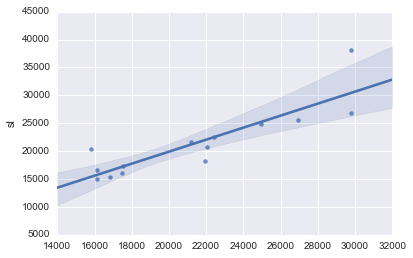

In [169]:
# Make some models with regularization. Apply to women first.

lmr = linear_model.RidgeCV()
model = lmr.fit(X2,y2)
predictions = lmr.predict(X2)
print 'Women model with Ridge Regularization score: ', lmr.score(X2,y2)
sns.regplot(x = predictions, y=y2)
print lmr.alpha_

Males run on a regularized regression for females has an R^2 score of:
0.726774045766


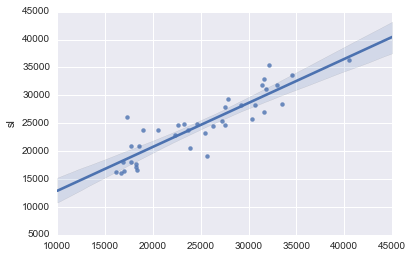

In [170]:
predictions = lmr.predict(X)
print 'Males run on a regularized regression for females has an R^2 score of:\n', lmr.score(X,y)
sns.regplot(x=predictions, y=y)
#This pretty significantly improves the results from the above 

In [171]:
# Results: Regularization definitely improved the second fit. Moreover, I feel like I'm starting 
# to understand how regularization is working to introduce more bias and reduce variance.
df.columns

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')

Score for doctorates:  0.876486548837


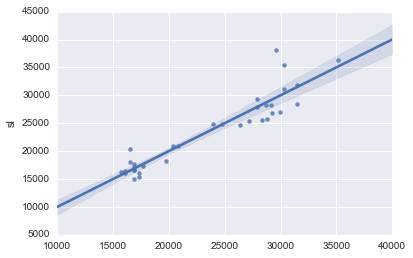

In [172]:
lm = linear_model.LinearRegression()
mask = df['dg']=='doctorate'
X= df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_male', u'sx_female']]
y= df[mask][u'sl']


model = lm.fit(X,y)
predictions = lm.predict(X)
print 'Score for doctorates: ', lm.score(X,y)
sns.regplot(x=predictions, y = y)

#This results in a pretty good model. If you know someone has a doctorate, and their rank, you 
# can pretty reliably show their salary.

Score for non-phDs on phD model:  0.6849888843


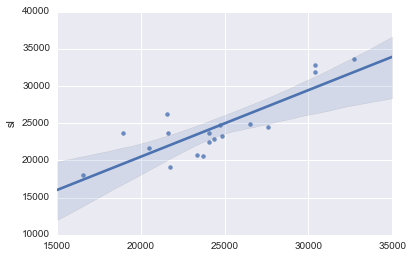

In [173]:
mask2 = (df["dg"] != "doctorate")
#Run the model for non-phDs
X2 = df[mask2][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_male', u'sx_female']]
y2 = df[mask2][u'sl']

predicts = lm.predict(X2)
print 'Score for non-phDs on phD model: ', lm.score(X2,y2)
sns.regplot(x=predicts, y=y2)
#The model doesn't fit great. We'll try again with regularization to see how it helps.

Score with regularization:  0.797059287095


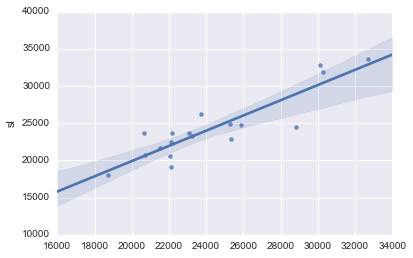

In [174]:
lmr = linear_model.RidgeCV()
model = lmr.fit(X2, y2)
predicts = lmr.predict(X2)
print 'Score with regularization: ', lmr.score(X2, y2)
sns.regplot(x=predicts, y=y2)
#This model is somewhat improved

Score with Regularization:  0.518546885368


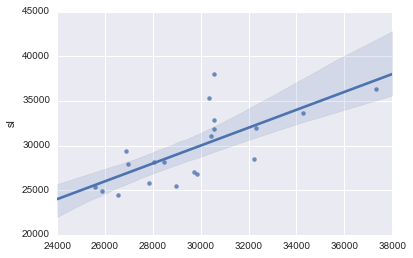

In [177]:
lm = linear_model.LinearRegression()
mask = (df["rk"] == "full")
X=df[mask][[u'yr', u'yd',u'dg_doctorate',
       u'dg_masters',u'sx_male', u'sx_female']]
y = df[mask][u'sl']

model = lm.fit(X,y)
predict = lm.predict(X)
print 'Score with Regularization: ', lm.score(X,y)
sns.regplot(x=predict, y=y)
#Not a great model

Score against other types of positions:  -4.60483198065


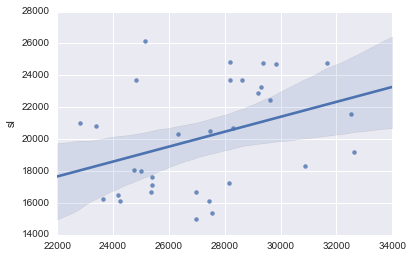

In [179]:

mask = (df['rk']!='full')
X=df[mask][[u'yr', u'yd',u'dg_doctorate',
       u'dg_masters',u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predict=lm.predict(X)
print 'Score against other types of positions: ', lm.score(X,y)
sns.regplot(predict, y)
#This model does not perform well against the other degree types.

Score with regularization:  0.485373992873


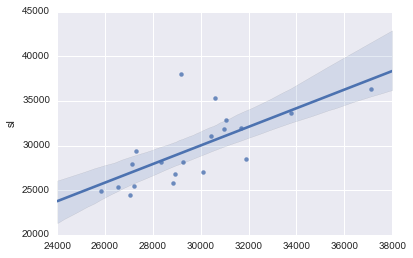

In [180]:
# Run the first model again with Ridge Regularization

lmr=linear_model.RidgeCV()
mask = (df["rk"] == "full")
X=df[mask][[u'yr', u'yd',u'dg_doctorate',
       u'dg_masters',u'sx_male', u'sx_female']]
y = df[mask][u'sl']
model=lmr.fit(X,y)
predict = lmr.predict(X)
print 'Score with regularization: ', lmr.score(X,y)
sns.regplot(predict, y)

Score for other types with regularization:  0.485373992873


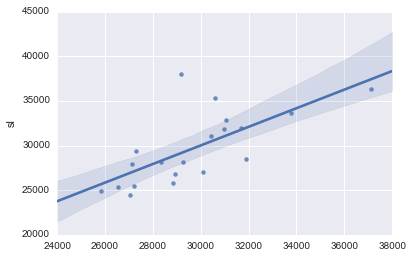

In [182]:
X=df[mask][[u'yr', u'yd',u'dg_doctorate',
       u'dg_masters',u'sx_male', u'sx_female']]
y = df[mask][u'sl']
predict = lmr.predict(X)
print 'Score for other types with regularization: ',lmr.score(X,y)
sns.regplot(predict,y)
#This still isn't a great model, but it improves things pretty substantially.